In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [5]:
print(x.shape, y.shape)

(70000, 784) (70000,)


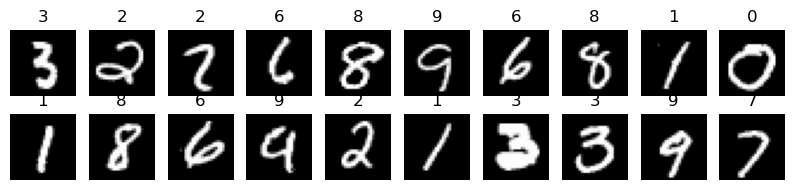

In [4]:
indices = np.random.randint(0, 70000, 20)

plt.figure(figsize=(10,2))
for i, idx in enumerate(indices):
    plt.subplot(2,10,i+1)
    plt.imshow(x[idx].reshape(28,28), cmap="gray")
    plt.title(y[idx])
    plt.axis("off")
plt.show()

In [5]:
np.isnan(x).sum()

0

In [6]:
y.shape[0] - y.shape[0]*.15, y.shape[0]*.15

(59500.0, 10500.0)

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= .15, random_state = 42)

In [8]:
ytrain.shape

(59500,)

In [100]:
pcaPipe = Pipeline([('prep', MinMaxScaler()), ('model', PCA())])
pcaPipe.fit(xtrain)
objasnjenaVar1 = pcaPipe['model'].explained_variance_ratio_
print(np.argmax(np.cumsum(objasnjenaVar1) >= .95))
### PRVIH 329 GLANIH KOMPONENTI OBJASNJAVA 95% VARIJACIJE
pca1 = PCA(n_components= np.argmax(np.cumsum(objasnjenaVar1) >= .95))
xtrainpca1 = pca1.fit_transform(xtrain)
xtrainInvers1 = pca1.inverse_transform(xtrainpca1)

153


In [102]:
pca2 = PCA()
pca2.fit(xtrain)
objasnjenaVar2 = pca2.explained_variance_ratio_
print(np.argmax(np.cumsum(objasnjenaVar2) >= .95))
pca2 = PCA(n_components= np.argmax(np.cumsum(objasnjenaVar2) >= .95))
xtrainpca2 = pca.fit_transform(xtrain)
xtrainInvers2 = pca.inverse_transform(xtrainpca2)

153


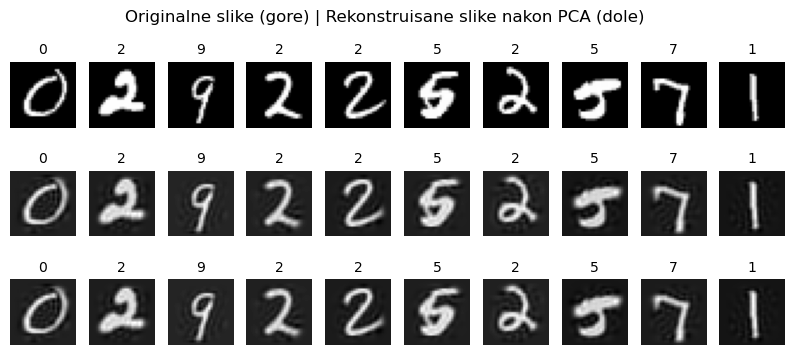

In [103]:
indices = np.random.randint(0, xtrain.shape[0], 10)

plt.figure(figsize=(10, 4))

for i, idx in enumerate(indices):
    # Originalna slika
    plt.subplot(3, 10, i + 1)
    plt.imshow(xtrain[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

    # Rekonstruisana slika nakon PCA inverzne transformacije
    plt.subplot(3, 10, i + 11)
    plt.imshow(xtrainInvers1[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

    plt.subplot(3, 10, i + 21)
    plt.imshow(xtrainInvers2[idx].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(ytrain[idx], fontsize=10)

plt.suptitle("Originalne slike (gore) | Rekonstruisane slike nakon PCA (dole)", fontsize=12)
plt.show()

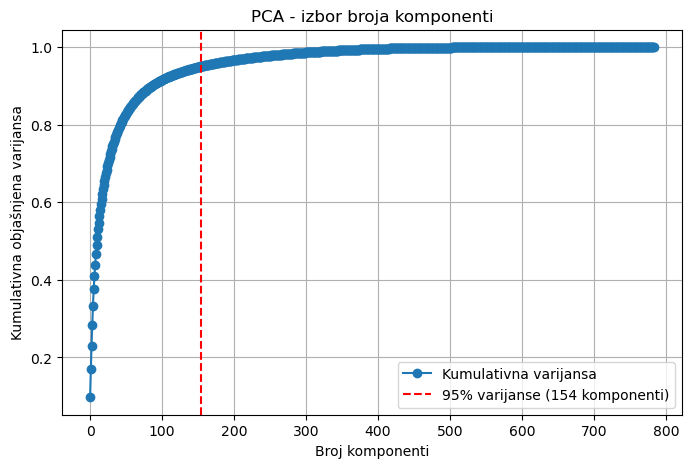

In [66]:
optimalanBrojKomponenti = np.argmax(np.cumsum(objasnjenaVar1) >= 0.95) + 1  # Dodajemo +1 jer np.argmax vraća indeks (indeksi počinju od 0)
# Vizualizacija varijanse po komponentama
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(objasnjenaVar1), marker='o', linestyle='-', label="Kumulativna varijansa")

# Obeležava tačku gde dostižemo 95% varijanse
plt.axvline(optimalanBrojKomponenti, color='r', linestyle='--', 
            label=f'95% varijanse ({optimalanBrojKomponenti} komponenti)')

plt.xlabel("Broj komponenti")
plt.ylabel("Kumulativna objašnjena varijansa")
plt.legend()
plt.title("PCA - izbor broja komponenti")
plt.grid()
plt.show()

In [110]:
(xtrainpca2 == xtrainpca1).mean()

1.0

In [130]:
pca, xtrainpca = pca2, xtrainpca2
xtestpca = pca.fit_transform(xtest)
print(xtestpca.shape)

(10500, 153)


In [134]:
xtrainpca.max()

2386.980677414908

In [182]:
np.logspace(0,1.3,7)

array([ 1.        ,  1.64689787,  2.71227258,  4.46683592,  7.35642254,
       12.11527659, 19.95262315])

In [194]:
MinMaxScaler().fit_transform(xtrainpca)

array([[0.55999556, 0.5248785 , 0.73815525, ..., 0.40356384, 0.52153357,
        0.4523982 ],
       [0.67083921, 0.51990097, 0.46832414, ..., 0.45778216, 0.53809166,
        0.46132181],
       [0.2224681 , 0.64925205, 0.58975639, ..., 0.46865329, 0.55376855,
        0.51940976],
       ...,
       [0.02900059, 0.63481139, 0.50273872, ..., 0.45152992, 0.51784829,
        0.51464236],
       [0.66525957, 0.64861944, 0.24503213, ..., 0.52299964, 0.53319802,
        0.47358597],
       [0.54188008, 0.87507086, 0.23207762, ..., 0.50464958, 0.40069236,
        0.39900861]])

In [212]:
prep = Pipeline([('pca', PCA(n_components=153)),('scaler', MinMaxScaler())])

In [214]:
prep.fit_transform(xtrain)

array([[0.55999556, 0.5248785 , 0.73815525, ..., 0.40356384, 0.52153357,
        0.4523982 ],
       [0.67083921, 0.51990097, 0.46832414, ..., 0.45778216, 0.53809166,
        0.46132181],
       [0.2224681 , 0.64925205, 0.58975639, ..., 0.46865329, 0.55376855,
        0.51940976],
       ...,
       [0.02900059, 0.63481139, 0.50273872, ..., 0.45152992, 0.51784829,
        0.51464236],
       [0.66525957, 0.64861944, 0.24503213, ..., 0.52299964, 0.53319802,
        0.47358597],
       [0.54188008, 0.87507086, 0.23207762, ..., 0.50464958, 0.40069236,
        0.39900861]])

In [218]:
xtrain.max()

255

In [208]:
Pipeline([('pca', PCA(n_components=153)),('scaler', MinMaxScaler())])

Pipeline(steps=[('pca', PCA(n_components=153)), ('scaler', MinMaxScaler())])

In [220]:
Pipeline([('prep', prep), ('model', LogisticRegression())])

Pipeline(steps=[('prep',
                 Pipeline(steps=[('pca', PCA(n_components=153)),
                                 ('scaler', MinMaxScaler())])),
                ('model', LogisticRegression())])

In [234]:
regulacija = np.logspace(0,1.5,10)
rezLogitTrain = []
rezLogitTest = []
prep = Pipeline([('pca', PCA(n_components=153)),('scaler', MinMaxScaler())])
for c in regulacija:
    pipeLogit = Pipeline([('prep', prep), ('model', LogisticRegression(C = c, max_iter = 1000))])
    pipeLogit.fit(xtrain, ytrain)
    rezLogitTrain.append(pipeLogit.score(xtrain, ytrain))
    rezLogitTest.append(pipeLogit.score(xtest, ytest))

In [239]:
np.argmax(rezLogitTrain), np.argmax(rezLogitTest)

(9, 5)

In [275]:
(np.array(rezLogitTest) -.9) *1000

array([16.28571429, 16.28571429, 16.57142857, 17.9047619 , 17.61904762,
       18.38095238, 17.23809524, 17.9047619 , 17.23809524, 18.38095238])

TypeError: array() missing required argument 'object' (pos 0)

In [251]:
rezLogitTest[5] == rezLogitTest[-1]

True

In [253]:
regulacija[5], regulacija[-1]

(6.812920690579611, 31.622776601683793)

In [230]:
regulacija[np.argmax(rezLogit)]

31.622776601683793

In [163]:
pipeLogit.score(xtrainpca, ytrain)

0.9227058823529412